# Image Filtering in the Time Domain

Here we will test **blurring filters** and **sharpening filters**.

For more information refer to [Filtering in the Time Domain](07_Filtragem_no_dominio_espacial.ipynb)

The picture shown below is the base for the whole filter exercise:

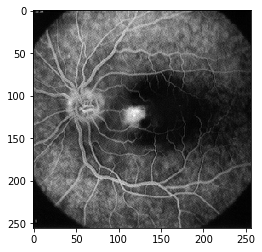

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
f = f.astype(float)
plt.imshow(f,cmap='gray')

**ATENTION** - filtering alters pixel values and sometimes thes values fall outside the 0-255 range. This means that it is good to always normalize array values and execute operations with dtype = float only.

## Part 1 - Mean Filters

In this first section, we shall evaluate the process of a simple 3x3 mean filter on a 7x7 image, to see how the convolution is executed and how borders are treated. 

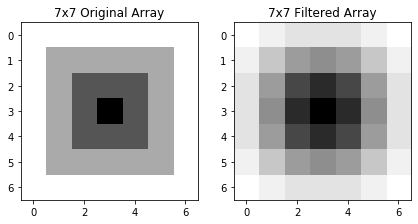

In [2]:
#Define our new image
array = np.array([[7,7,7,7,7,7,7],[7,6,6,6,6,6,7],[7,6,5,5,5,6,7],[7,6,5,4,5,6,7],[7,6,5,5,5,6,7],[7,6,6,6,6,6,7],[7,7,7,7,7,7,7]])

#Make array type float to not lose information
array = array.astype(float) 

#Setup the mean filter
s=3
mean_filter=np.ones((s,s))/(s*s)

#Filter the image
filteredArray = skf.edges.convolve(array,mean_filter) #in default border handling mode (reflect) 

#Plot both images in subplot
fig, axs = plt.subplots(1,2,figsize=(7,7))

plt.subplot(121)
plt.title('7x7 Original Array')
plt.imshow(array, cmap='gray')

plt.subplot(122)
plt.title('7x7 Filtered Array')
plt.imshow(filteredArray, cmap='gray')

After running the above code and seeing the output, we wonder if the result of the convolution is correct. So we quickly calculate the convolution on paper to check. After doing so, we can see that the output is correct. Naturally, if we convolve numerically (on paper), the output is a 5x5 matrix, if we don't consider border handling. In this case, the 5x5 result is the same as the 5x5 center of the 7x7 output matrix above. We can also check that the border handling is being done correctly. Remebering that the default mode (used above) is "reflect", we create a 11x11 matrix by reflecting the 7x7 (only 11x11 is needed due to the 3x3 kernel). We then convolve with the same kernel and can see that the result is the same as in the image above (values shown in output below).

In the first block of code, we saw the input and output images. Below we print the actual arrays of the original image, the kernel and the output image to better understand what the above output represents.

In [3]:
print('Original Array:\n' + str(array) + '\n')
print('Kernel:\n'+str(mean_filter) + '\n')
print('Filtered Array:\n' + str(filteredArray) + '\n')

Original Array:
[[7. 7. 7. 7. 7. 7. 7.]
 [7. 6. 6. 6. 6. 6. 7.]
 [7. 6. 5. 5. 5. 6. 7.]
 [7. 6. 5. 4. 5. 6. 7.]
 [7. 6. 5. 5. 5. 6. 7.]
 [7. 6. 6. 6. 6. 6. 7.]
 [7. 7. 7. 7. 7. 7. 7.]]

Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Filtered Array:
[[6.88888889 6.77777778 6.66666667 6.66666667 6.66666667 6.77777778
  6.88888889]
 [6.77777778 6.44444444 6.11111111 6.         6.11111111 6.44444444
  6.77777778]
 [6.66666667 6.11111111 5.44444444 5.22222222 5.44444444 6.11111111
  6.66666667]
 [6.66666667 6.         5.22222222 4.88888889 5.22222222 6.
  6.66666667]
 [6.66666667 6.11111111 5.44444444 5.22222222 5.44444444 6.11111111
  6.66666667]
 [6.77777778 6.44444444 6.11111111 6.         6.11111111 6.44444444
  6.77777778]
 [6.88888889 6.77777778 6.66666667 6.66666667 6.66666667 6.77777778
  6.88888889]]



Now we want to see the effect that the mean filter has on an actual image, so we convolve an image of a retina with the kernel used above. The result is as follows:

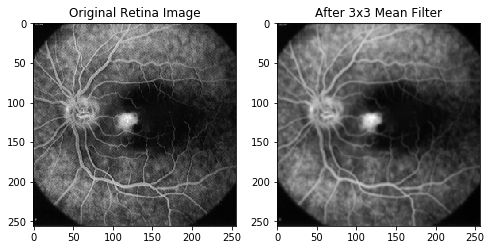

In [4]:
#Filter image
MeanFilteredRetina = skf.edges.convolve(f,mean_filter) #convolve with default mode (reflect)
MeanFilteredRetina *= 255.0 / MeanFilteredRetina.max() #normalize to not escape 0-255 range 

#Show images in subplot
plt.subplots(1,2,figsize=(8,8))

plt.subplot(121)
plt.title('Original Retina Image')
plt.imshow(f, cmap='gray')

plt.subplot(122)
plt.title('After 3x3 Mean Filter')
plt.imshow(MeanFilteredRetina, cmap = 'gray')

As wee can see, the images features are slightly blurred in the filtered version. Now let's see what happens with the image when we apply the same filter, but change the kernel's size:

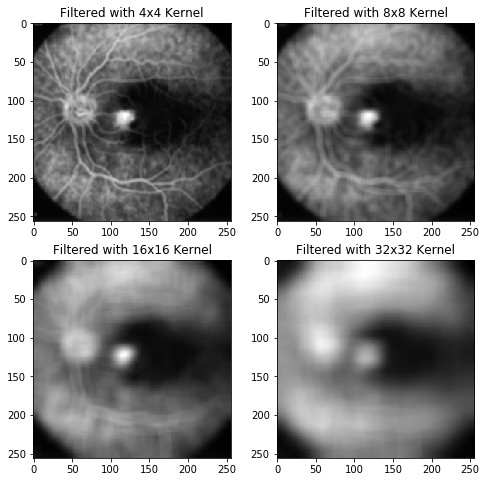

In [5]:
#Create new kernels
filter4 = np.ones((4,4))/(4*4)
filter8 = np.ones((8,8))/(8*8)
filter16 = np.ones((16,16))/(16*16)
filter32 = np.ones((32,32))/(32*32)

#Apply filters to the image and normalize (as done above)
filter4Retina = skf.edges.convolve(f,filter4)
filter4Retina *= 255.0 / filter4Retina.max()

filter8Retina = skf.edges.convolve(f,filter8)
filter8Retina *= 255.0 / filter8Retina.max()

filter16Retina = skf.edges.convolve(f,filter16)
filter16Retina *= 255.0 / filter16Retina.max()

filter32Retina = skf.edges.convolve(f,filter32)
filter32Retina *= 255.0 / filter32Retina.max()

#Show images in subplot
plt.subplots(2,2,figsize=(8,8))

plt.subplot(221)
plt.title('Filtered with 4x4 Kernel')
plt.imshow(filter4Retina, cmap = 'gray')

plt.subplot(222)
plt.title('Filtered with 8x8 Kernel')
plt.imshow(filter8Retina, cmap='gray')

plt.subplot(223)
plt.title('Filtered with 16x16 Kernel')
plt.imshow(filter16Retina, cmap = 'gray')

plt.subplot(224)
plt.title('Filtered with 32x32 Kernel')
plt.imshow(filter32Retina, cmap = 'gray')

It's easy to see that the larger the kernel size, the more blurred the filtered image becomes. Now let's see what changes based on the border treatment technique that is used (mode):
    
**Reflect Mode:** outer values are reflected at the edge of input to fill in missing values (this includes diagonally at corners)

**Constant Mode:** choose a value to fill the necessary border extension with (only one value, skf default is 0)
    
**Nearest Mode:** the single nearest value in to an edge in input is repeated as many times as needed to match the overlapping weights.
    
**Mirror Mode:** Input array values outside the bounds of the array are computed by mirror-reflecting the array across the array border.
    
**Wrap Mode:** nput array values outside the bounds of the array are computed by implicitly assuming the input array is periodic.
    
Observation: here we use an abnormally large kernel size to make the difference between modes easily visible

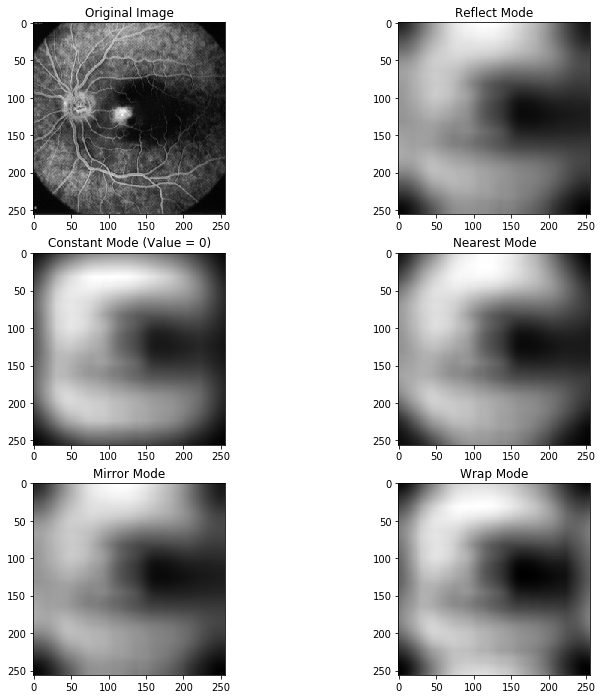

In [6]:
# change modes while using 32x32 filter
filter32 = np.ones((64,64)) / (64*64)

filter16Retina = skf.edges.convolve(f,filter32) #reflect mode
filter16Retina *= 255.0 / filter16Retina.max() #normalize

filter16Retina_cst = skf.edges.convolve(f,filter32, mode='constant') #constant mode, default value 0
filter16Retina_cst *= 255.0 / filter16Retina_cst.max() #normalize

filter16Retina_near = skf.edges.convolve(f,filter32, mode='nearest') #nearest mode 
filter16Retina_near *= 255.0 / filter16Retina_near.max() #normalize

filter16Retina_mir = skf.edges.convolve(f,filter32, mode='mirror') #mirror mode
filter16Retina_mir *= 255.0 / filter16Retina_mir.max() #normalize

filter16Retina_wrap = skf.edges.convolve(f,filter32, mode='wrap') #wrap mode
filter16Retina_wrap *= 255.0 / filter16Retina_wrap.max() #normalize

#Show images in subplot
plt.subplots(3,2, figsize=(12,12))

plt.subplot(321)
plt.title('Original Image')
plt.imshow(f, cmap='gray')

plt.subplot(322)
plt.title('Reflect Mode')
plt.imshow(filter16Retina, cmap='gray')

plt.subplot(323)
plt.title('Constant Mode (Value = 0)')
plt.imshow(filter16Retina_cst, cmap='gray')

plt.subplot(324)
plt.title('Nearest Mode')
plt.imshow(filter16Retina_near, cmap='gray')

plt.subplot(325)
plt.title('Mirror Mode')
plt.imshow(filter16Retina_mir, cmap='gray')

plt.subplot(326)
plt.title('Wrap Mode')
plt.imshow(filter16Retina_wrap, cmap='gray')

As we can see, each mode produces a slightly different result. The idea is that which one yields a better result depends on the nature of the image that is being filtered. 

## Part 2 - Gaussian Filters and Noise Reduction

Here we define a 2D gaussian filter "g" and two 1D gaussian filters "g1" and "g2". Then we add the two 1D filters two create a second 2D filter. Finally, we filter the retina image with both gaussian filters and compare results:

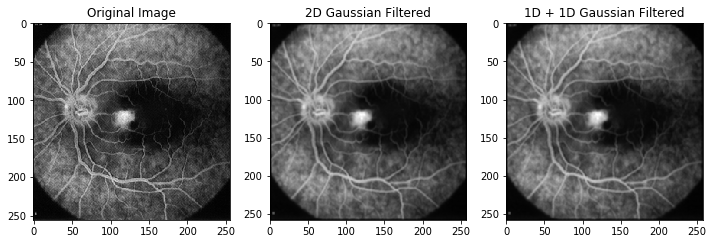

In [7]:
import sys,os
ea979path = os.path.abspath('../../')
if ea979path not in sys.path:
    sys.path.append(ea979path)
import ea979.src as ia

#Use ia toolbox gaussian function to generate gaussian filter kernels with the desired dimensions
g = ia.gaussian((3,3), np.transpose([[1,1]]), [[2,0],[0,2]])
g=g/g.sum() #normalize

g1 = ia.gaussian((3,1),np.transpose([[1,1]]), [[2,0],[0,2]])
g1=g1/g1.sum() #normalize

g2 = ia.gaussian((1,3),np.transpose([[1,1]]), [[2,0],[0,2]])
g2=g2/g2.sum() #normalize

#add 1D gaussian kernels to attempt to create 2D kernel
g_composed = g1+g2
g_composed = g_composed/g_composed.sum()

#Filter image with 2D gaussian filter
G = ia.conv(f,g)
G *= 255.0 / G.max()

#Filter image with "1D+1D" gaussian filter
G_composed = ia.conv(f,g_composed)
G_composed *= 255.0 / G_composed.max()

#show images in subplots
plt.subplots(1,3, figsize=(12,12))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(f, cmap='gray')

plt.subplot(132)
plt.title('2D Gaussian Filtered')
plt.imshow(G, cmap='gray')

plt.subplot(133)
plt.title('1D + 1D Gaussian Filtered')
plt.imshow(G_composed, cmap='gray')

As expected, the gaussian filter also slightly blurs the image. What is very interesting is that both the 2D filtered image and the "1D+1D" filtered image look extremely alike. So let's test to check if they are the same:

In [8]:
if G.all() == G_composed.all():
    print('True')
else: print('False')

True


As we can see, they are. This means that filters can be decomposed and applied one after the other, rendering the same results. It also means, as we saw above, that one dimensional filters can be combined into two directional filters without change in performance.

Now, let's test the capacity of the gaussian filter to remove noise. To try to remove noise, we must first apply noise to our (noiseless) retina image. So we apply gaussian noise to our original retina image:

Text(0.5, 1.0, 'Retina with Gaussian Noise')

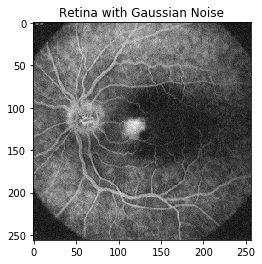

In [9]:
#Create array with same shape as the image, filled with random gaussian noise
noise = np.random.normal(0,10,f.shape) # mean, std dev, shape

#Generate noisy image by adding noise to the image element-by-element
noisy_f = np.add(f,noise)
noisy_f *= 255.0 / noisy_f.max() #normalize 

#Show the image with gaussian noise
plt.imshow(noisy_f,cmap='gray')
plt.title('Retina with Gaussian Noise')

Now let's apply our gaussian filter to the noisy image by convolving the image with our gaussian filter kernel "g":

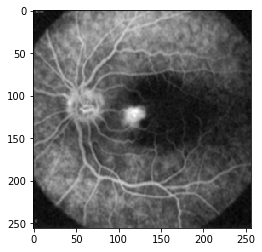

In [10]:
#Filter noisy retina image with the original 2D gaussian filter
restored_f = skf.edges.convolve(noisy_f, g, mode = 'mirror')

#Show filtered image
plt.imshow(restored_f, cmap='gray')

As we can see, the gaussian filter is an effective noise removing filter, as most of the noise seen in the "noisy_f" image is no longer present in the "restored_f" image. Unfortunately, this nois removal is at the cost of image resolution, as we can see that the "restored_f" image is blurred, compared to the original image.

## Part 3 - Sobel Filter and Edge Detection

In [11]:
import numpy as np

#Generarte veritical edge kernel
Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

#Generate horizontal edge kernel
Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


First, we apply each sobel kernel (vertical and horizontal) to the image "G", already filtered by the Gaussian Filter. To do so, we convolve G & Sv and G & Sh.

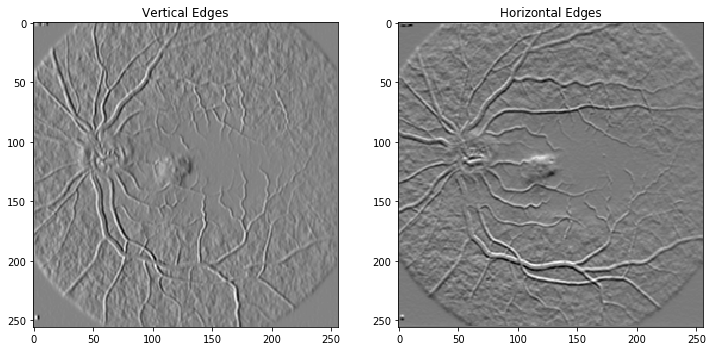

In [12]:
#apply vertical filter
f_edges_v = skf.edges.convolve(f, Sv, mode= 'mirror')
f_edges_v *= 255.0 / f_edges_v.max() #normalize

#apply horizontal filter
f_edges_h = skf.edges.convolve(f, Sh, mode= 'mirror') 
f_edges_h *= 255.0 / f_edges_h.max() #normalize

#setup subplot
plt.subplots(1,2,figsize=(12,12)) 

plt.subplot(121)
plt.title('Vertical Edges')
plt.imshow(f_edges_v, cmap='gray')

plt.subplot(122)
plt.title('Horizontal Edges')
plt.imshow(f_edges_h, cmap='gray')


Now we want to obtain the final image of the retina with edge detection. So we apply the MagSobel function to combine the vertical edges with the horizontal edges: $$MagSobel = \sqrt{f_h^2 + f_v^2}$$

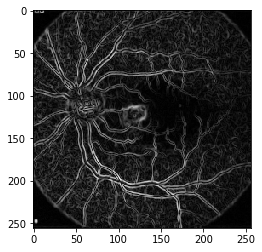

In [13]:
#Generate final image with MagSobel function
f_magSobel = np.sqrt(np.add(np.square(f_edges_v), np.square(f_edges_h)))  
f_magSobel *= 255.0 / f_magSobel.max() #normalize values to keep them between 0 and 255

#Show final image
plt.imshow(f_magSobel, cmap='gray')